In [23]:
import string
import random
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import TimeDistributedDense, Activation, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import os
from theano.tensor.shared_randomstreams import RandomStreams
srng = RandomStreams(seed=234)
import numpy as np
from keras.utils import np_utils
from matplotlib import pyplot
from tempfile import mkdtemp
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import matplotlib.pyplot as plt
import theano
from keras.layers.wrappers import TimeDistributed
import keras
from  keras.optimizers import Adadelta
from scipy.misc import toimage
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout,Activation , initializations, regularizers, constraints
from keras.layers.convolutional import Convolution1D,Convolution2D, MaxPooling2D, ZeroPadding2D, MaxPooling1D
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
%matplotlib inline
from keras import backend as K
from keras.layers import Merge
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from keras.utils import np_utils
from keras.engine.topology import Layer
from keras.layers.core import Dense, Activation, TimeDistributedDense, Dropout, Reshape, Flatten
from keras.layers.recurrent import LSTM
import traceback
import re
import sys
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline

/home/sunil/.local/lib/python2.7/site-packages/fuzzywuzzy/fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
stringSize = 100 # defining string size
maxWordLength = 100 

In [3]:
# lets consider 63 basic character, those occur the most
# character to integer mapping dictionary
charToInt = {'0':0,'1':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'A':10,'a':11,'B':12,'b':13,'C':14,'c':15,'D':16,'d':17,'E':18,'e':19,'F':20,'f':21,'G':22,'g':23,'H':24,'h':25,'I':26,'i':27,'J':28,'j':29,'K':30,'k':31,'L':32,'l':33,'M':34,'m':35,'N':36,'n':37,'O':38,'o':39,'P':40,'p':41,'Q':42,'q':43,'R':44,'r':45,'S':46,'s':47,'T':48,'t':49,'U':50,'u':51,'V':52,'v':53,'W':54,'w':55,'X':56,'x':57,'Y':58,'y':59,'Z':60,'z':61 ,' ':62,'.':63}

In [4]:
# integer to character maping dictionary 
intToChar = {v: k for k, v in charToInt.iteritems()}

In [5]:
def string_generator(size=stringSize, chars=string.ascii_uppercase + string.digits):
    """
    will generate random string
    """
    return ''.join(random.choice(chars) for _ in range(size))

In [6]:
def mutator(originalString, percentageMutation):
    """
    will take a string and mutate it as per percentage specified
    """
    originalStringArray = list(originalString)
    for i in range(percentageMutation):
        # print originalStringArray
        randomPlace = random.randint(0,len(originalString)-1)
        randomLetter = random.choice(string.letters)
        originalStringArray[randomPlace] = randomLetter
    return "".join(originalStringArray)

In [7]:
def giveWordmatrix(word):
    """
    will generate 2d matrix of the string, which will be an input to convolutional network
    word : is a string given to function
    """
    #2d matrix of size 100*63 initilaized with all cell having value "false"
    tempMatrix = np.zeros((maxWordLength, 63),dtype=bool)
    charNo=0
    for charNo in range (0,len(word)):
        if charNo<maxWordLength:
            try:
                try:
                    # for above defined 63 character, if character exists then "true" is placed in place 
                    characterToIndex = int(word[charNo])
                    tempMatrix[charNo][characterToIndex]=True
                    charNo += 1
                except:
                    characterToIndex = charToInt[word[charNo]]
                    tempMatrix[charNo][characterToIndex]=True
                    charNo += 1
            except:
                tempMatrix[charNo][0]=False
    
    return tempMatrix

In [10]:
# lets do little visualization

# generating new string
originalString = string_generator()
# print originalString
# mutating the same string randomly
prcentageMutation = random.randint(0,100)
mutatedString = mutator(originalString,prcentageMutation)

# genearting 2d matrix for original string
originalStringMatrix = giveWordmatrix(originalString)
# genearting 2d matrix for mutated string
mutatedStringMatrix = giveWordmatrix(mutatedString)

Original String


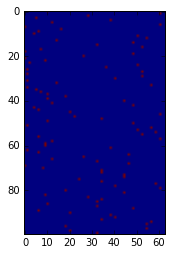

Mutated String


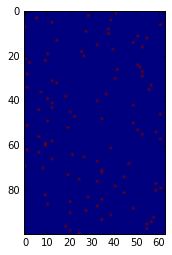

In [11]:
# visualizing original and muataed string
print ("Original String")
pyplot.imshow(toimage(originalStringMatrix)) #showing first image
pyplot.show()
print ("Mutated String")
pyplot.imshow(toimage(mutatedStringMatrix)) #showing first image
pyplot.show()

In [15]:
# defining model

# model2 will take original string
model2 = Sequential()
model2.add(Convolution1D(64, 3, border_mode='same', input_shape=(100, 63,)))
model2.add(MaxPooling1D(pool_length=2))
model2.add(Convolution1D(nb_filter=128,filter_length=3,border_mode='valid',activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='sigmoid'))
# model2.summary()

# model1 will take mutated string
model1 = Sequential()
model1.add(Convolution1D(64, 3, border_mode='same', input_shape=(100, 63,)))
model1.add(MaxPooling1D(pool_length=2))
model1.add(Convolution1D(nb_filter=128,filter_length=3,border_mode='valid',activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='sigmoid'))

# both model merges 
merged = Merge([model1, model2], mode='concat')
# final model will decide final result
final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(64))
final_model.add(Activation('tanh'))
final_model.add(Dense(64))
final_model.add(Activation('tanh'))

final_model.add(Dense(100, activation='sigmoid'))
final_model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_7 (Convolution1D)  (None, 100, 64)       12160       convolution1d_input_4[0][0]      
____________________________________________________________________________________________________
maxpooling1d_4 (MaxPooling1D)    (None, 50, 64)        0           convolution1d_7[0][0]            
____________________________________________________________________________________________________
convolution1d_8 (Convolution1D)  (None, 48, 128)       24704       maxpooling1d_4[0][0]             
____________________________________________________________________________________________________
flatten_4 (Flatten)              (None, 6144)          0           convolution1d_8[0][0]            
___________________________________________________________________________________________

In [9]:
# compiling model
final_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['mse'])

In [13]:
# file to watch intermediate results
testFileOut = open("intermediate_results.txt","w") 

# repeate for 5000 iterations, you may change this
for times in range(10000):
    originalStringArray  = [] # to keep original strings
    mutatedStringArray = [] # to keep mutated strings
    percentageSameArray = []
    response = [] # to keep percentage simillarity between original and mutated strings
    print times
    
    # every time new 10000 strings and their mutated strings are generated and kept in RAM
    for batchOf in range(10000):
        # generating origianl string
        originalString = string_generator()
        #randomly deciding percentage mutation
        prcentageMutation = random.randint(1,100)
        #100(stringSize) - mutation = percentage simillarity between original and muatated string
        percentageSame = 100-prcentageMutation
        percentageSameArray.append(percentageSame)
        #generating mutated string
        mutatedString = mutator(originalString,prcentageMutation)
        
        #generating original string matrix
        originalStringMatrix = giveWordmatrix(originalString)
        #appending original string matrix to originalStringArray
        #after 10000 loops, originalStringArray will be having marix for 10000 original strings
        originalStringArray.append(originalStringMatrix)
        
        #generating mutated string matrix
        mutatedStringMatrix = giveWordmatrix(mutatedString)
        #appending mutated string matrix to mutatedStringArray
        #after 10000 loops, mutatedStringArray will be having marix for 10000 muated strings
        mutatedStringArray.append(mutatedStringMatrix)
        
        #response vector is having %simillarity  between original and muatated string
        #after 10000 loops, response will be having % for above geenrated 10000 original and 
        #corrosponding mutated strings
        response.append(percentageSame)
        
    if times%1000 == 0:
        # at every 1000 iteration it will dump output to testFileOut; this is to see progress of learning
        #converting originalStringArray having 10000 strings to numpy boolean array
        originalStringArray =  np.asarray(originalStringArray,dtype = 'bool')
        # changed nothing in reshape; precautionary 
        originalStringArray = originalStringArray.reshape(originalStringArray.shape[0],originalStringArray.shape[1],originalStringArray.shape[2])
        
        #converting mutatedStringArray having 10000 mutated strings to numpy boolean array
        mutatedStringArray =  np.asarray(mutatedStringArray,dtype = 'bool')
        # changed nothing in reshape; precautionary 
        mutatedStringArray = mutatedStringArray.reshape(mutatedStringArray.shape[0], mutatedStringArray.shape[1],mutatedStringArray.shape[2])
        
        #converting respose vector to categorical "one hot encoding" 
        #when we use categorical_crossentropy as loss function, converting to "one hot encoding" is must.
        response = np_utils.to_categorical(response,100)
        
        # training
        final_model.fit([originalStringArray,mutatedStringArray],response,batch_size=10000,nb_epoch=1, verbose=2,validation_split=0.2)
        # getting probability for intermediate inspection
        prob =  final_model.predict_classes([originalStringArray,mutatedStringArray],verbose=0)
        
        # writting to file
        for eachNo in range(0,len(list(prob))):
            testFileOut.write(str(prob[eachNo])+"\t"+str(percentageSameArray[eachNo])+"\n")
        testFileOut.flush()
    else:
        # When in pection is not required
        #converting originalStringArray having 10000 strings to numpy boolean array
        originalStringArray =  np.asarray(originalStringArray,dtype = 'bool')
        # changed nothing in reshape; precautionary 
        originalStringArray = originalStringArray.reshape(originalStringArray.shape[0],originalStringArray.shape[1],originalStringArray.shape[2])
        #converting mutatedStringArray having 10000 mutated strings to numpy boolean array
        mutatedStringArray =  np.asarray(mutatedStringArray,dtype = 'bool')
        # changed nothing in reshape; precautionary 
        mutatedStringArray = mutatedStringArray.reshape(mutatedStringArray.shape[0], mutatedStringArray.shape[1],mutatedStringArray.shape[2])
        
        #converting respose vector to categorical "one hot encoding" 
        #when we use categorical_crossentropy as loss function, converting to "one hot encoding" is must.
        response = np_utils.to_categorical(response,100)
        # training
        final_model.fit([originalStringArray,mutatedStringArray],response,batch_size=10000,nb_epoch=1, verbose=1,validation_split=0.2)

In [ ]:
# to save model
# final_model.save_weights("string_matching_refined.h5")

In [18]:
# to load model
final_model.load_weights("string_matching.h5")

In [35]:
# testing on random 100 strings
for i in range(100):
    # gerate new original string
    originalString = string_generator()
    # generated mutated string
    prcentageMutation = random.randint(0,99)
    percentageSame = 100-prcentageMutation
    mutatedString = mutator(originalString,prcentageMutation)
    
    #Get numpy matrrix for original And muuated string
    originalStringMatrix_test = giveWordmatrix(originalString)
    mutatedStringMatrix_test = giveWordmatrix(mutatedString)

    # reshaping to meet dimension requirement
    originalStringArray = originalStringMatrix_test.reshape(1,originalStringMatrix_test.shape[0],originalStringMatrix_test.shape[1])
    mutatedStringArray = mutatedStringMatrix_test.reshape(1, mutatedStringMatrix_test.shape[0],mutatedStringMatrix_test.shape[1])
#     print "Original String :",originalString
#     print "Mutated String :",mutatedString
#     # printing 
    print originalString,"\t",mutatedString,"\t","Predicted:\t",final_model.predict_classes([originalStringArray,mutatedStringArray],verbose=0)[0],"\tOriginal\t",percentageSame,"\t Levenshtein Distance\t", fuzz.token_sort_ratio(originalString,mutatedString)

PQSPUK8N2U23QI6TIC0QA6OQ61SKT8Q5GFCYZM9LXJD7CFPTOTFRB59Z8SKTCXFLNXZ5P7U0ZR5EAUAKC3R4DY48RWOB8GFWIMKI 	PQSPPK8X2Uo3QI6nQS0aA6OP61SKT8Q5tCunvt9LvJD7CFPTOTJRB59B8SKuCYFLNXe5PnUZZR5EAUGbC3R4DYwlReOB8GFWKMKI 	Predicted:	67 	Original	64 	 Levenshtein Distance	73
8TWTZZGHOPV2BMVI0MOTDPYSYQ0WRVADDY60PDLDNORA6NF4TXE9QY0SPXPXD37A5I3PH7NTVLQQGETNK27ZVSD2UJC3P8HU0Z8V 	8TWTZZGHOPV2BMVI0MOTDPYSuQ0ARVbDDY60PDLDNORA6Nj4TXE9QY0SoaPXJ37Q5I3PH7NKVLcaZETvK27ZVSD2lJCHP8HU0F8V 	Predicted:	77 	Original	84 	 Levenshtein Distance	82
6HBQFWZUOAI536CS30H7CRVGXAV4OGFQGZBN80AFXONABMQTPDIMPYTBSX209EXHXBTXXIKSLNO6LX1WJ97L4JC4UC18I4ACWL2N 	IeBTFWZUyRI536CSg0H7KRVGhAVdOGfQFZBN80dqXgUATMtSPfhMlYTBoX2s9IXHXBgzXIgSONPaLX1WJI7L4wC4UCPYI4AoJL2N 	Predicted:	57 	Original	50 	 Levenshtein Distance	63
FHGOE4MR7U2PLVUWMSIHX3NAA4M9YQJ12RN97LQFSJGCWGPVLMZIHFL30SEWBB50M608TOYRW0DJJHMJDZSFPA8ADGYAKTMX4UGM 	FiGOE4MtsObPLVlWMSIdXhRAA4M9oYJWxyN9crQtSJNCrDPVYpPwHFL30RhWnCE0LVk8WuYRG0DJJHYHGZSFmA8iVGZAKMFXPUGt 	Predicted:	45 	Original	3

39
